<a href="https://colab.research.google.com/github/shuchita28/NASA-Star-Type-Classification/blob/main/NASA_Star_Type_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Stars.csv to Stars.csv
User uploaded file "Stars.csv" with length 8421 bytes


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [47]:
stars = pd.read_csv('Stars.csv')

In [48]:
stars.head(3)

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.0024,0.1700,16.12,Red,M,0
1,3042,0.0005,0.1542,16.60,Red,M,0
2,2600,0.0003,0.1020,18.70,Red,M,0


In [49]:
index = stars.index
index.name = 'Index'

In [50]:
stars.head(3)

,Temperature,L,R,A_M,Color,Spectral_Class,Type
Index,,,,,,,
0,3068,0.0024,0.1700,16.12,Red,M,0
1,3042,0.0005,0.1542,16.60,Red,M,0
2,2600,0.0003,0.1020,18.70,Red,M,0


In [51]:
stars.columns

Index(['Temperature', 'L', 'R', 'A_M', 'Color', 'Spectral_Class', 'Type'], dtype='object')

In [52]:
stars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [53]:
stars.isna().sum()

Temperature       0
L                 0
R                 0
A_M               0
Color             0
Spectral_Class    0
Type              0
dtype: int64

In [54]:
stars.describe()

,Temperature,L,R,A_M,Type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [60]:
stars.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Temperature    1.321568
L              2.068069
R              1.946800
A_M           -0.121540
Type           0.000000
dtype: float64

In [63]:
stars.duplicated().sum()

0

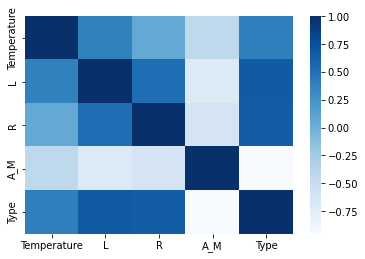

In [92]:
sns.heatmap(stars.corr(), 
            cmap = 'Blues')

In [80]:
stars.columns

Index(['Temperature', 'L', 'R', 'A_M', 'Color', 'Spectral_Class', 'Type'], dtype='object')

In [89]:
for i in ['Color', 'Spectral_Class', 'Type']:
  print("\n",i, " --->\n", stars[i].unique())
  print("\n",i, " --->\n", stars[i].value_counts())


 Color  --->
 ['Red' 'Blue White' 'White' 'Yellowish White' 'Blue white'
 'Pale yellow orange' 'Blue' 'Blue-white' 'Whitish' 'yellow-white'
 'Orange' 'White-Yellow' 'white' 'yellowish' 'Yellowish' 'Orange-Red'
 'Blue-White']

 Color  --->
 Red                   112
Blue                   56
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              4
white                   3
Yellowish White         3
yellowish               2
Whitish                 2
Orange                  2
White-Yellow            1
Pale yellow orange      1
Yellowish               1
Orange-Red              1
Blue-White              1
Name: Color, dtype: int64

 Spectral_Class  --->
 ['M' 'B' 'A' 'F' 'O' 'K' 'G']

 Spectral_Class  --->
 M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: Spectral_Class, dtype: int64

 Type  --->
 [0 1 2 3 4 5]

 Type  --->
 0    40
1    40
2    40
3    40
4    40
5    40
Name: Type, dtype: int64


In [91]:
stars['Color'] = stars['Color'].replace('Blue White', 'Blue-White')
stars['Color'] = stars['Color'].replace('Blue white', 'Blue-White')
stars['Color'] = stars['Color'].replace('Blue-white', 'Blue-White')
stars['Color'] = stars['Color'].replace('Whitish', 'White')
stars['Color'] = stars['Color'].replace('white', 'White')
stars['Color'] = stars['Color'].replace('yellow-white', 'White-Yellow')
stars['Color'] = stars['Color'].replace('Yellowish White', 'White-Yellow')
stars['Color'] = stars['Color'].replace('yellowish', 'White-Yellow')
stars['Color'] = stars['Color'].replace('Yellowish', 'White-Yellow')  

for i in ['Color', 'Spectral_Class', 'Type']:
  print("\n",i, " --->\n", stars[i].unique())
  print("\n",i, " --->\n", stars[i].value_counts())


 Color  --->
 ['Red' 'Blue-White' 'White' 'White-Yellow' 'Pale yellow orange' 'Blue'
 'Orange' 'Orange-Red']

 Color  --->
 Red                   112
Blue                   56
Blue-White             41
White-Yellow           15
White                  12
Orange                  2
Pale yellow orange      1
Orange-Red              1
Name: Color, dtype: int64

 Spectral_Class  --->
 ['M' 'B' 'A' 'F' 'O' 'K' 'G']

 Spectral_Class  --->
 M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: Spectral_Class, dtype: int64

 Type  --->
 [0 1 2 3 4 5]

 Type  --->
 0    40
1    40
2    40
3    40
4    40
5    40
Name: Type, dtype: int64
